<a href="https://colab.research.google.com/github/LeTrai/Tuan5/blob/main/Bai2ngay27_2_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=7e4079273ed27357dea1eb7b4d68ab4c7dfc78e9e7758687518a929521d30b0a
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

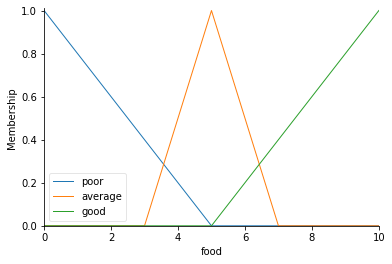

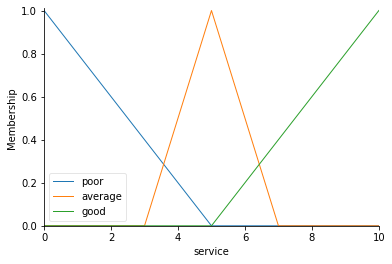

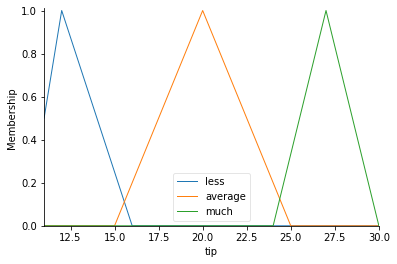

In [27]:
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Antecedent(np.arange(11,31,1),'tip')
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[3,5,7])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[3,5,7])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,12,16])
tip['average'] = fuzz.trimf(tip.universe,[15,20,25])
tip['much'] = fuzz.trimf(tip.universe,[24,27,30])
food.view()
service.view()
tip.view()

ValueError: ignored

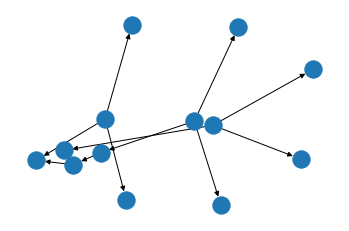

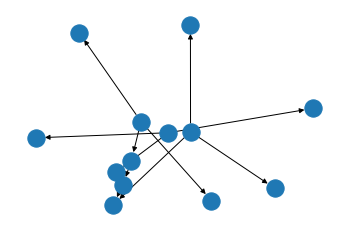

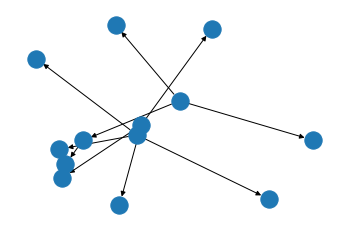

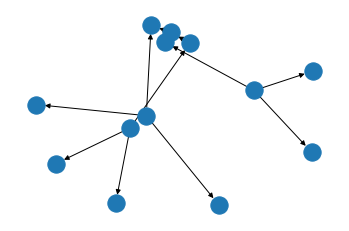

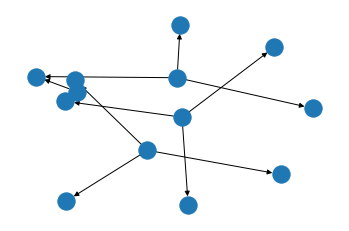

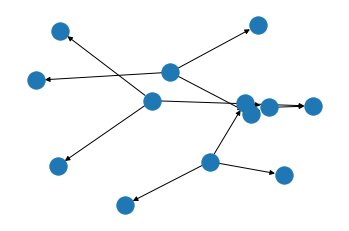

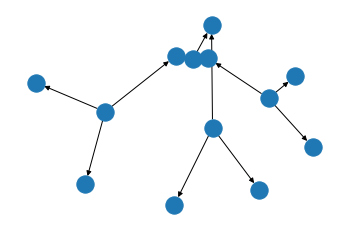

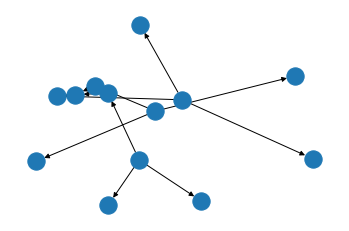

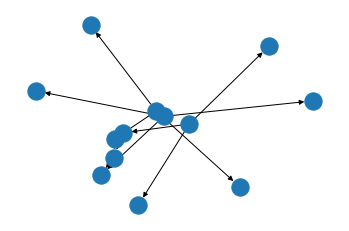

In [38]:
rule1 = ctrl.Rule(food['poor'] | service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] | service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor'] | service['good'], tip['average'])
rule4 = ctrl.Rule(food['average'] | service['poor'], tip['less'])
rule5 = ctrl.Rule(food['average'] | service['average'], tip['average'])
rule6 = ctrl.Rule(food['average'] | service['good'], tip['much'])
rule7 = ctrl.Rule(food['good'] | service['poor'], tip['average'])
rule8 = ctrl.Rule(food['good'] | service['average'], tip['much'])
rule9 = ctrl.Rule(food['good'] | service['good'], tip['much'])

rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=7
tipping.input['service']=9
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)